In this notebook, I will be using different machine learning models to predict the presence of parkinson disease in a patient and discover the best model

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import cohen_kappa_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import pickle
import os


In [43]:
df = pd.read_csv('../data/parkinsons.data')
print(df.shape,'\n')
df.head()

(195, 24) 



,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


**Feature Engineering**

In [44]:
print("Original shape of data: ", df.shape)
x = df.drop(['status','name'], axis=1)
print("Featues shape:", x.shape)
y = df.status
print("Target shape: ", y.shape)

Original shape of data:  (195, 24)
Featues shape: (195, 22)
Target shape:  (195,)


**Train Test Split**

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2) 

#### Applying StandardScaler

In [46]:
scaler = StandardScaler()
scaler.fit(x_train)

# Save the scaler in the "scalers/" folder using pickle
scaler_file = r"C:\Users\Admin\Desktop\Week_9\Final_project\Scalers\scaler_file.pkl"

with open(scaler_file, 'wb') as f:
    pickle.dump(scaler, f)

print("Scaler file saved successfully.")

x_train_scaled = scaler.transform(x_train)
x_test_scaled  = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

Scaler file saved successfully.


#### Balancing Dataset

In [47]:
sampler = RandomOverSampler()
x_train,y_train = sampler.fit_resample(x_train, y_train)

#### Model evaluation function

In [48]:
def evaluate_classification_model(name, y, y_pred):
    print("Evaluate " + name)
    # Visualization of Confusion Matrix
    cf_matrix = confusion_matrix(y, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy = accuracy_score(y, y_pred)
    kappa_score = cohen_kappa_score(y, y_pred)

    print("Accuracy: ", round(accuracy, 2))
    print("Kappa Score:", round(kappa_score, 2))


#### Logistic Regression

In [49]:
clf = LogisticRegression()

#Train Model
clf.fit(x_train, y_train)

# Save the model into the "models/" folder using pickle
import pickle

model_file = r"C:\Users\Admin\Desktop\Week_9\Final_project\Models\logistic.pkl"

with open(model_file, 'wb') as f:
    pickle.dump(clf, f)

print("Model saved successfully.")


Model saved successfully.


In [50]:
# Prediction on Test and Train Set 
pred_logistic_test = clf.predict(x_test)
pred_logistic_train = clf.predict(x_train)

Evaluate Logistic Regression (TRAIN)


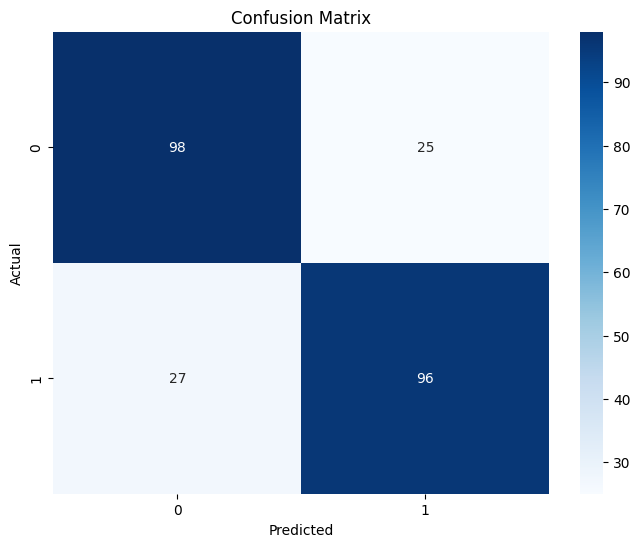

Accuracy:  0.79
Kappa Score: 0.58


In [51]:
evaluate_classification_model("Logistic Regression (TRAIN)", y_train, pred_logistic_train)

Evaluate Logistic Regression (TEST)


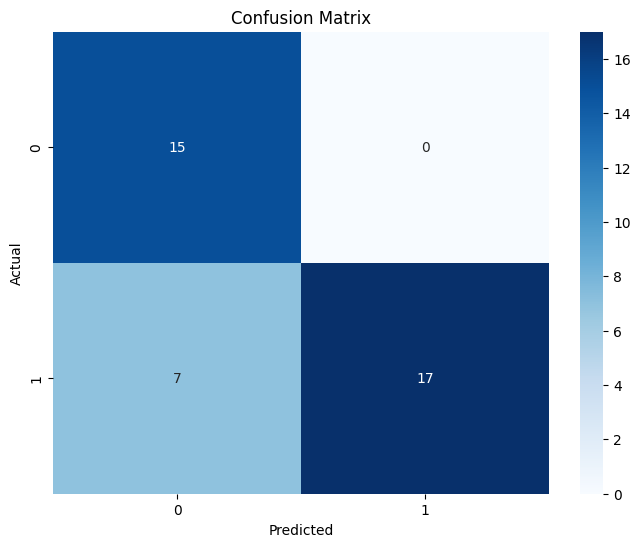

Accuracy:  0.82
Kappa Score: 0.65


In [52]:
evaluate_classification_model("Logistic Regression (TEST)", y_test, pred_logistic_test)

**Decision Tree**

In [53]:
dt = DecisionTreeClassifier()

# Train model 
dt.fit(x_train, y_train)

# save the model into the "models" folder using pickle

model_file = r"C:\Users\Admin\Desktop\Week_9\Final_project\Models\decision_tree.pkl"

with open(model_file, 'wb') as f:
    pickle.dump(dt, f)

print("Model saved successfully.")


Model saved successfully.


In [54]:
pred_dt_test = dt.predict(x_test)
pred_dt_train = dt.predict(x_train)

In [55]:
kappa_score = cohen_kappa_score(y_test, pred_dt_test)
kappa_score

0.5555555555555556

In [56]:
#evaluate_classification_model("Logistic Regression (TRAIN)", y_train, pred_logistic_train)

Evaluate DecisionTreeClassifier(TRAIN)


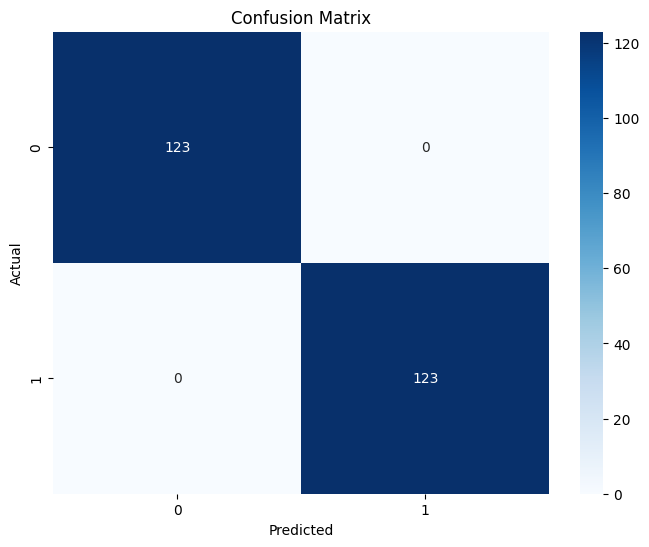

Accuracy:  1.0
Kappa Score: 1.0


In [57]:
evaluate_classification_model("DecisionTreeClassifier(TRAIN)", y_train, pred_dt_train)

Evaluate DecisionTreeClassifier(TEST)


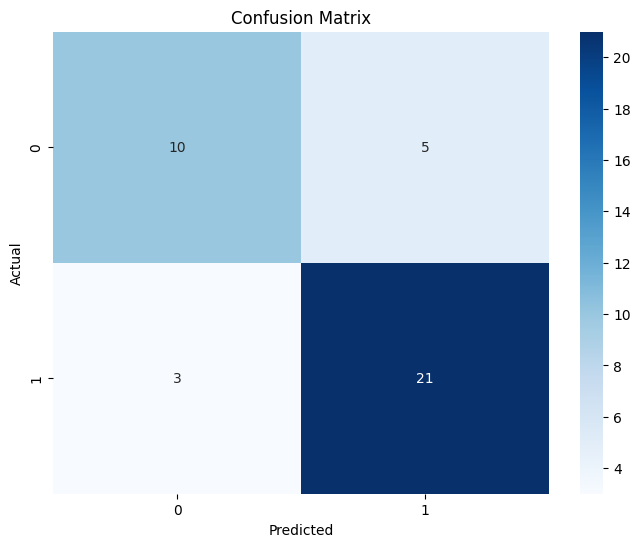

Accuracy:  0.79
Kappa Score: 0.56


In [58]:
evaluate_classification_model("DecisionTreeClassifier(TEST)", y_test, pred_dt_test)

**Random Forest**

In [59]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

model_file = r"C:\Users\Admin\Desktop\Week_9\Final_project\Models\randomforest.pkl"

with open(model_file, 'wb') as f:
    pickle.dump(rf, f)

print("Model saved successfully.")


Model saved successfully.


In [60]:
train_pred_rf = rf.predict(x_train)
pred_rf = rf.predict(x_test)

Evaluate RandomForestClassifier(TRAIN)


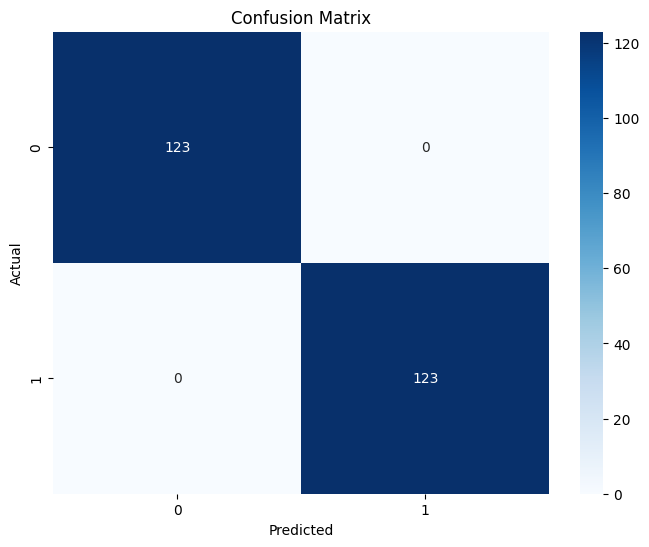

Accuracy:  1.0
Kappa Score: 1.0


In [61]:
evaluate_classification_model("RandomForestClassifier(TRAIN)", y_train, train_pred_rf)

Evaluate RandomForestClassifier(TEST)


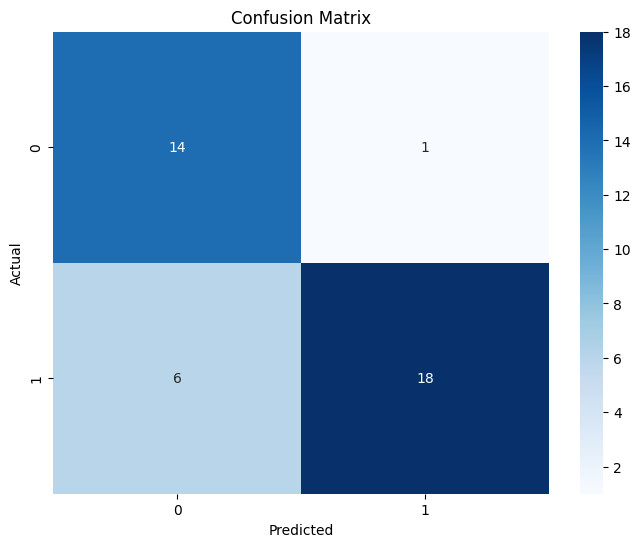

Accuracy:  0.82
Kappa Score: 0.64


In [62]:
evaluate_classification_model("RandomForestClassifier(TEST)", y_test, pred_rf)

**Gradient Boosting**

In [63]:
gb = GradientBoostingClassifier()

# Training model
gb.fit(x_train, y_train)

model_file = r"C:\Users\Admin\Desktop\Week_9\Final_project\Models\gradient_boosting.pkl"

with open(model_file, 'wb') as f:
    pickle.dump(gb, f)

print("Model saved successfully.")


# Prediction on test and train set
gb_pred_train = gb.predict(x_train)
gb_pred = gb.predict(x_test)

Model saved successfully.


Evaluate GradientBoostingClassifier(TRAIN)


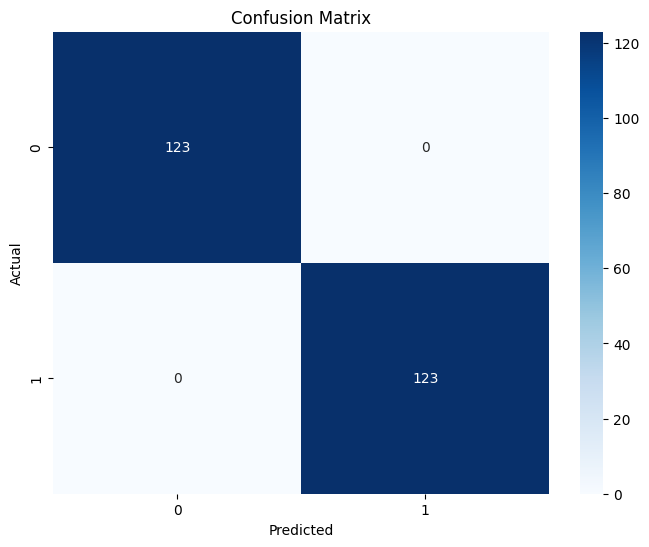

Accuracy:  1.0
Kappa Score: 1.0


In [64]:
evaluate_classification_model("GradientBoostingClassifier(TRAIN)", y_train, gb_pred_train)

Evaluate GradientBoostingClassifier(TEST)


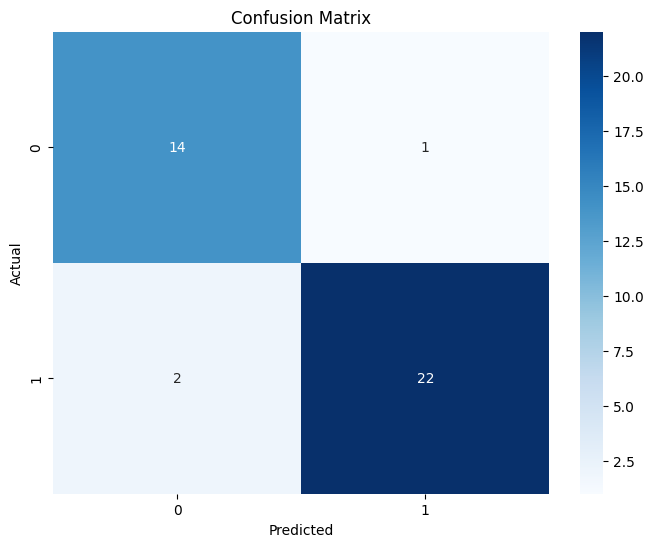

Accuracy:  0.92
Kappa Score: 0.84


In [65]:
evaluate_classification_model("GradientBoostingClassifier(TEST)", y_test, gb_pred)

**XG Boost**

In [66]:
xg = xgb.XGBClassifier()

# Training model
xg.fit(x_train, y_train)
model_file = r"C:\Users\Admin\Desktop\Week_9\Final_project\Models\xgb_classifier.pkl"

with open(model_file, 'wb') as f:
    pickle.dump(xg, f)

print("Model saved successfully.")

Model saved successfully.


In [67]:
# prediction on train and test set
xg_pred_train = xg.predict(x_train)
xg_pred = xg.predict(x_test)

Evaluate xgb.XGBClassifier(TRAIN)


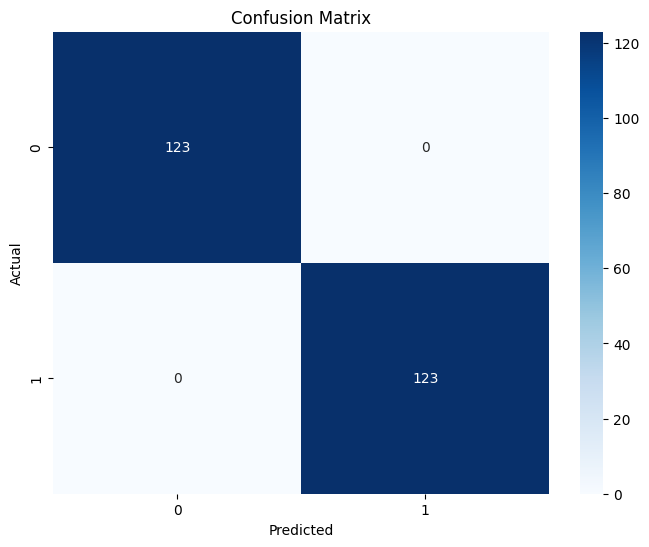

Accuracy:  1.0
Kappa Score: 1.0


In [68]:
evaluate_classification_model("xgb.XGBClassifier(TRAIN)", y_train, xg_pred_train)

Evaluate xgb.XGBClassifier(TEST)


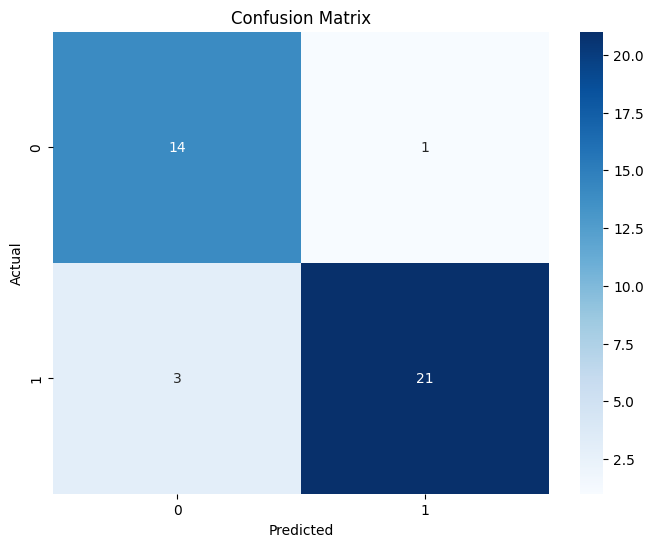

Accuracy:  0.9
Kappa Score: 0.79


In [69]:
evaluate_classification_model("xgb.XGBClassifier(TEST)", y_test, xg_pred)

**Conclusion : Random Forest and XG-Boost both are over 88% accurate in predicting disease with a kappa score of over 80% score too**

In [70]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: 0.955265306122449


In [74]:
""""
X = data.drop(['name', 'status'], axis=1)
y = data['status']

Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create a random forest classifier
rf = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best Parameters: ", grid_search.best_params_)

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy: ", accuracy)
"""


'"\nX = data.drop([\'name\', \'status\'], axis=1)\ny = data[\'status\']\n\nSplit the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\nDefine the parameter grid\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [None, 5, 10],\n    \'min_samples_split\': [2, 5, 10]\n}\n\n# Create a random forest classifier\nrf = RandomForestClassifier()\n\n# Create a GridSearchCV object\ngrid_search = GridSearchCV(rf, param_grid, cv=5)\n\n# Fit the GridSearchCV object to the training data\ngrid_search.fit(X_train, y_train)\n\n# Print the best parameters found by grid search\nprint("Best Parameters: ", grid_search.best_params_)\n\n# Evaluate the model with the best parameters on the test set\nbest_model = grid_search.best_estimator_\naccuracy = best_model.score(X_test, y_test)\nprint("Accuracy: ", accuracy)\n'